In [1]:
import csv

In [11]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os.path
import json
import google.auth
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

# If modifying these SCOPES, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

def get_sheet_names_and_ids(spreadsheet_id, creds_file, token_file):
    creds = None
    if os.path.exists(token_file):
        creds = Credentials.from_authorized_user_file(token_file, SCOPES)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(creds_file, SCOPES)
            creds = flow.run_local_server(port=0)
        with open(token_file, 'w') as token:
            token.write(creds.to_json())
    
    service = build('sheets', 'v4', credentials=creds)
    sheet_metadata = service.spreadsheets().get(spreadsheetId=spreadsheet_id).execute()
    sheets = sheet_metadata.get('sheets', '')
    
    result = []
    for sheet in sheets:
        sheet_name = sheet.get("properties", {}).get("title", "")
        sheet_id = sheet.get("properties", {}).get("sheetId", "")
        result.append({'name': sheet_name, 'gid': sheet_id})
    
    return result

if __name__ == '__main__':
    # Replace with your Google Sheets ID and path to your credentials file
    SPREADSHEET_ID = '1BgP_mbAc7kn1rxV6_ROBbG-WOoVBX5hD5xfgFbqxQDU'
    CREDS_FILE = '/Users/lukasfrosslund/code/emtips2021excel/client_secret_980160792434-27i3kn32iu3n9qqkq43s6maefuhakfin.apps.googleusercontent.com.json'
    TOKEN_FILE = 'token.json'

    sheets_info = get_sheet_names_and_ids(SPREADSHEET_ID, CREDS_FILE, TOKEN_FILE)
    for sheet in sheets_info:
        print(f"Sheet Name: {sheet['name']}, GID: {sheet['gid']}")


In [5]:
sheets_info = sheets_info[3:]

68

In [26]:
with open('scores.csv') as csvfile:
    rows = csv.reader(csvfile)
    res = list(zip(*rows))
    res = res[-2:]

In [33]:
names = res[0][3:45]
points = res[1][3:45]

In [49]:
scoresDict = {"scores": []}
scoresZip = zip(names, points)
for item in scoresZip:
    scoresDict["scores"].append({"name": item[0], "points": int(item[1])})

In [50]:
scoresDict

{'scores': [{'name': 'Lukas Frösslund', 'points': 4},
  {'name': 'Jennifer Johansson', 'points': 4},
  {'name': 'Albin Thurén', 'points': 4},
  {'name': 'Erik Gustafsson', 'points': 4},
  {'name': 'Cajsa Eriksson', 'points': 4},
  {'name': 'Patric Hjorth', 'points': 4},
  {'name': 'Jacob Hjorth', 'points': 4},
  {'name': 'Andreas Eriksson', 'points': 4},
  {'name': 'Anton Wårdell', 'points': 4},
  {'name': 'David Berg', 'points': 4},
  {'name': 'Ted Karlsson', 'points': 4},
  {'name': 'Alexander Jarlenäs', 'points': 4},
  {'name': 'Hedvig Fahlstedt', 'points': 4},
  {'name': 'Adam de Lancey', 'points': 4},
  {'name': 'Tor Simmons', 'points': 4},
  {'name': 'Noel Milleskog', 'points': 4},
  {'name': 'Hanna Milleskog', 'points': 4},
  {'name': 'Rickard Brånemark', 'points': 4},
  {'name': 'William Laahanen', 'points': 2},
  {'name': 'Adam Laahanen', 'points': 2},
  {'name': 'Johannes Karlsson', 'points': 2},
  {'name': 'Filip Lidhammar', 'points': 2},
  {'name': 'William Magnusson', 'poi

In [2]:
import json

In [59]:
with open('scores.json', 'w') as f:
    json.dump(scoresDict, f, ensure_ascii=False)

In [3]:
json_string

NameError: name 'json_string' is not defined

In [4]:
import pandas as pd 

In [47]:
sheetList = [{'name': 'Lukas Frösslund', 'points': 2054910135},
  {'name': 'Jennifer Johansson', 'points': 367674404},
  {'name': 'Albin Thurén', 'points': 351386624},
  {'name': 'Erik Gustafsson', 'points': 1356020415},
  {'name': 'Cajsa Eriksson', 'points': 1763715858},
  {'name': 'Patric Hjorth', 'points': 956825562},
  {'name': 'Jacob Hjorth', 'points': 1623203222},
  {'name': 'Andreas Eriksson', 'points': 1249302655},
  {'name': 'Anton Wårdell', 'points': 396050143},
  {'name': 'David Berg', 'points': 1688944588},
  {'name': 'Ted Karlsson', 'points': 861631264},
  {'name': 'Alexander Jarlenäs', 'points': 1095748200},
  {'name': 'Hedvig Fahlstedt', 'points': 1876713390},
  {'name': 'Adam de Lancey', 'points': 942871444},
  {'name': 'Tor Simmons', 'points': 135785318},
  {'name': 'Noel Milleskog', 'points': 773274216},
  {'name': 'Hanna Milleskog', 'points': 866646381},
  {'name': 'Rickard Brånemark', 'points': 315893603},
  {'name': 'William Laahanen', 'points': 1314708184},
  {'name': 'Adam Laahanen', 'points': 2141502958},
  {'name': 'Johannes Karlsson', 'points': 101737574},
  {'name': 'Filip Lidhammar', 'points': 1572752502},
  {'name': 'William Magnusson', 'points': 268517332},
  {'name': 'Hugo Arvidsson', 'points': 550474824},
  {'name': 'Robert Lidhammar', 'points': 1965949287},
  {'name': 'Viktor Hansson', 'points': 1062474688},
  {'name': 'Isabella Johannesson', 'points': 1631251563},
  {'name': 'Pontus Lundgren', 'points': 220966450},
  {'name': 'Oscar Andersson', 'points': 1670072045},
  {'name': 'Kenneth Runnman', 'points': 2108224413},
  {'name': 'Patricia Correia', 'points': 955752933},
  {'name': 'Amanda Nilsson', 'points': 46684960},
  {'name': 'Alicia Brånemark', 'points': 2022670665},
  {'name': 'Filip Mälberg', 'points': 279112572},
  {'name': 'Jonny Frösslund', 'points': 2103240923},
  {'name': 'Joel Fahlstedt', 'points': 98219501},
  {'name': 'Anna Brånemark', 'points': 42437357},
  {'name': 'Per Kivijärvi', 'points': 855220829},
  {'name': 'Valdemar Gezelius', 'points': 1651765570},
  {'name': 'Sebastian Brånemark', 'points': 696325482},
  {'name': 'Linnéa Amundson', 'points': 1950141069},
  {'name': 'Andreas Schill', 'points': 1576817809}]

In [ ]:
sheet_list = [
    {'name': 'Jacob Hjorth', 'id': 1705896954},
    {'name': 'Adrian Brånemark', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
    {'name': '', 'id': 0},
]

In [15]:
sheets_info

[{'name': 'Jacob Hjorth', 'gid': 1705896954},
 {'name': 'Adrian Brånemark', 'gid': 845560671},
 {'name': 'David Carlsson', 'gid': 1171244747},
 {'name': 'Felix Andersson', 'gid': 1501103698},
 {'name': 'Erik Gustafsson', 'gid': 1569051184},
 {'name': 'Karin Kelvered', 'gid': 1639552023},
 {'name': 'Matilda Svensson', 'gid': 3135272},
 {'name': 'Jesper Engström', 'gid': 1680690303},
 {'name': 'Andreas Roddan Eriksson', 'gid': 1892456296},
 {'name': 'Jesper Mattsson', 'gid': 148370873},
 {'name': 'Erik Dewall', 'gid': 1479616826},
 {'name': 'Cajsa Eriksson', 'gid': 1465098272},
 {'name': 'Robert Lidhammar', 'gid': 600558285},
 {'name': 'Noel Andersson', 'gid': 1058970280},
 {'name': 'Robert Johansson', 'gid': 234386403},
 {'name': 'Adam Blixt', 'gid': 1962957473},
 {'name': 'Sebastian Jarlenäs', 'gid': 629012500},
 {'name': 'Per Nykvist', 'gid': 1008746028},
 {'name': 'Jonathan Lagerquist', 'gid': 354437640},
 {'name': 'Peter Larsson', 'gid': 1740922458},
 {'name': 'Elon Folkesson', 'gid

In [11]:
from tqdm import tqdm
import pandas as pd

In [27]:
df_stats = {}
completeSpreadsheetIdx = "1BgP_mbAc7kn1rxV6_ROBbG-WOoVBX5hD5xfgFbqxQDU"
for sheet in tqdm(sheets_info):
    participant = sheet['name']
    sheet_idx = sheet['gid']
    df_stats[sheet_idx] = {}
    df_stats[sheet_idx]['name'] = participant

    url = f"https://docs.google.com/spreadsheets/d/{completeSpreadsheetIdx}/export?format=csv&gid={sheet_idx}"
    curr_df = pd.read_csv(url)
    df_stats[sheet_idx]['winner'] = curr_df.iloc[2, 24]
    df_stats[sheet_idx]['topscorer'] = curr_df.iloc[3, 24]
    df_stats[sheet_idx]['most_goals_scores'] = curr_df.iloc[4, 24]
    df_stats[sheet_idx]['most_goals_conceeded'] = curr_df.iloc[5, 24]
    df_stats[sheet_idx]['extra_time'] = curr_df.iloc[6, 24]
    df_stats[sheet_idx]['red_cards'] = curr_df.iloc[7, 24]
    
    df_stats[sheet_idx]['matches'] = []
    match_idx = 2
    while match_idx <= 52:
        for i in range(6):
            df_stats[sheet_idx]['matches'].append(
                {
                    'home': curr_df.iloc[match_idx, 3],
                    'away': curr_df.iloc[match_idx, 5],
                    'home_goals': int(float(curr_df.iloc[match_idx, 6])),
                    'away_goals': int(float(curr_df.iloc[match_idx, 8])),
                    'sign': curr_df.iloc[match_idx, 9],
                }
            )
            match_idx += 1
        match_idx += 3
    
    df_stats[sheet_idx]['roundofsixteen'] = []
    match_idx = 56
    while match_idx <= 63:
        df_stats[sheet_idx]['roundofsixteen'].append(curr_df.iloc[match_idx, 3])
        df_stats[sheet_idx]['roundofsixteen'].append(curr_df.iloc[match_idx, 5])
        match_idx += 1
    
    df_stats[sheet_idx]['quarterfinals'] = []
    match_idx = 67
    while match_idx <= 70:
        df_stats[sheet_idx]['quarterfinals'].append(curr_df.iloc[match_idx, 3])
        df_stats[sheet_idx]['quarterfinals'].append(curr_df.iloc[match_idx, 5])
        match_idx += 1
    
    df_stats[sheet_idx]['semifinals'] = []
    match_idx = 74
    while match_idx <= 75:
        df_stats[sheet_idx]['semifinals'].append(curr_df.iloc[match_idx, 3])
        df_stats[sheet_idx]['semifinals'].append(curr_df.iloc[match_idx, 5])
        match_idx += 1
    
    df_stats[sheet_idx]['final'] = []
    df_stats[sheet_idx]['final'].append(curr_df.iloc[79, 3])
    df_stats[sheet_idx]['final'].append(curr_df.iloc[79, 5])


100%|██████████| 68/68 [04:27<00:00,  3.93s/it]


In [21]:
curr_df.iloc[2, 24]

'Frankrike'

In [ ]:
df_stats

In [28]:
import pickle 

def dumpPickle(df, name):
    picklefile = open(name, 'wb')
    pickle.dump(df, picklefile)
    picklefile.close()
    print("Pickle dumped and picklefile closed.")


def loadPickle(name):
    picklefile = open(name, 'rb')
    df = pickle.load(picklefile)
    return df

In [29]:
dumpPickle(df_stats, "all_stats_tips.pkl")

Pickle dumped and picklefile closed.


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
dfStats[42437357]['topscorer'] = 'Ronaldo'

In [72]:
topscorers = []
for key in dfStats.keys():
    topscorers.append(dfStats[key]['topscorer'])

In [73]:
topscorers

['Serge Gnabry',
 'Harry Kane',
 'Lukaku',
 'Cristiano Ronaldo',
 'Kylian Mbappé',
 'Kane',
 'Harry Kane',
 'Harry Kane',
 'Lukaku',
 'Ronaldo',
 'Romelu Lukaku',
 'Harry Kane',
 'Kylian Mbappé',
 'Harry Kane',
 'Benzema',
 'Griezmann ',
 'Mbpappe',
 'Grassman',
 'Memphis Depay',
 'Cristiano Ronaldo',
 'Mbappe',
 'Kylian Mbappe',
 'Lukaku',
 'Harry Kane',
 'Harry Kane',
 'Cristiano Ronaldo',
 'Harry Kane',
 'Romelu Lukaku',
 'Kylian Mbappé',
 'Romelu Lukau',
 'Cristiano Ronaldo',
 'Mbappe',
 'Alexander Isak ',
 'Lukaku',
 'Mbappe',
 'Bibimbap/ Mbappé',
 'Ronaldo',
 'Alexander Isak',
 'Harry Kane',
 'Romelu Lukaku',
 'Harry Kane',
 'Harry Kane']

In [12]:
topscorers = [('Harry Kane', 12), ('Kylian Mbappé', 9), ('Romelu Lukaku', 8), ('Cristiano Ronaldo', 6),  ('Alexander Isak', 2), ('Antoine Griezmann', 2), ('Memphis Depay', 1), ('Serge Gnabry', 1),  ('Karim Benzema', 1)]

' ax1.axhline(0, color="k", clip_on=False)\nax1.set_ylabel("Sequential") '

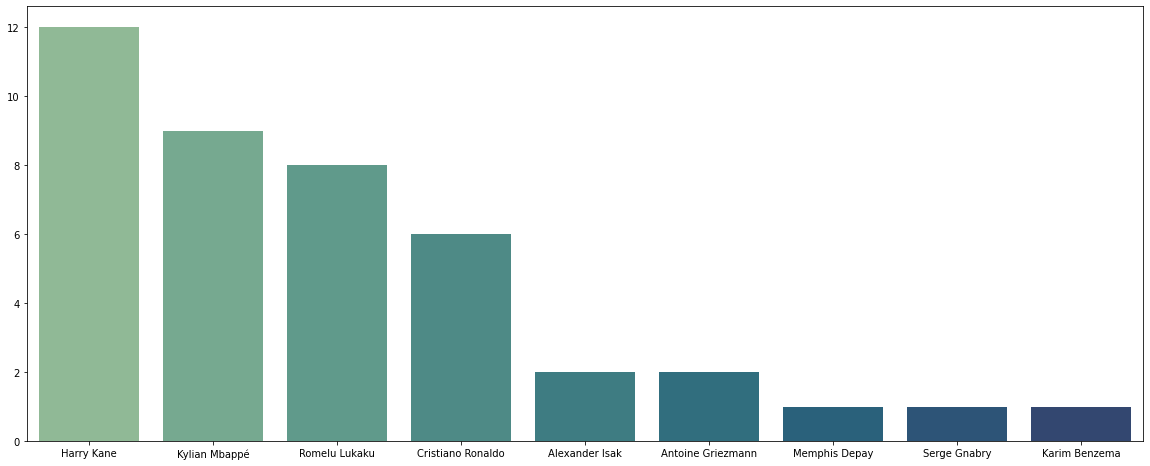

In [15]:
x = []
y = []
for player in topscorers:
    x.append(player[0])
    y.append(player[1])
x = np.array(x)
y = np.array(y)
dims = (20, 8)
fig, ax = plt.subplots(figsize=dims)
barp = sns.barplot(x=x, y=y, palette="crest", ax=ax)
fig = barp.get_figure()
fig.savefig(dpi=300, fname="topscorers_plot")
""" ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential") """

In [4]:
df = loadPickle("allStatsTips")

In [30]:
df = df_stats

In [31]:
winners = {}
for key in df.keys():
    winner = df[key]['winner']
    if winner in winners:
        winners[winner] += 1
    else:
        winners[winner] = 1

In [32]:
winners

{'Frankrike': 36,
 'England': 12,
 'Portugal': 3,
 'Spanien': 2,
 'Tyskland': 12,
 'Italien': 2,
 'Nederländerna': 1}

In [35]:
sorted_winners = dict(sorted(winners.items(), key=lambda item: item[1], reverse=True))

In [36]:
sorted_winners

{'Frankrike': 36,
 'England': 12,
 'Tyskland': 12,
 'Portugal': 3,
 'Spanien': 2,
 'Italien': 2,
 'Nederländerna': 1}

In [33]:
list(winners.values())

[36, 12, 3, 2, 12, 2, 1]

In [44]:
from matplotlib.font_manager import FontProperties

In [79]:
def create_plot(data, headline, filename, to_sort=True):
    if to_sort:
        data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
    x = np.array(list(data.keys()))
    y = np.array(list(data.values()))
    dims = (20, 8)
    fig, ax = plt.subplots(figsize=dims)
    barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)

    # Add values on top of each bar as integers and make the text larger and bold
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), 'd'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 10),  # 9 points vertical offset
                    textcoords = 'offset points',
                    fontsize=24)  # larger and bold text

    # Custom font properties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Verdana')
    font.set_size(40)

    # Add a title to the plot
    ax.set_title(headline, loc='left', fontproperties=font)
    ax.tick_params(axis='x', labelsize=18)

    fig = barp.get_figure()
    fig.savefig(dpi=300, fname=f"plots/{filename}")

/var/folders/k0/jwj71hc55md02dcytnxyr9s80000gn/T/ipykernel_79121/4063048186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)


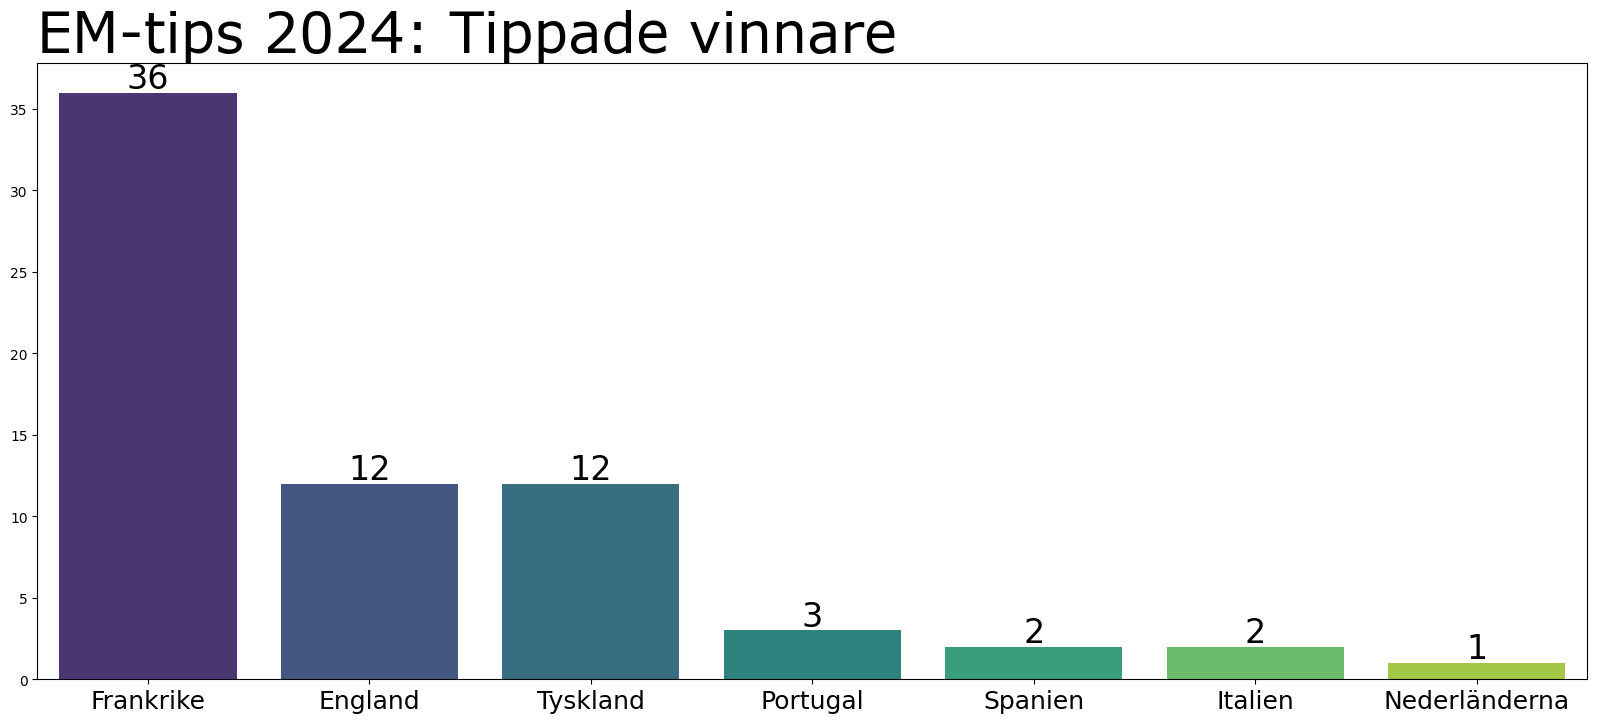

In [67]:

x = np.array(list(sorted_winners.keys()))
y = np.array(list(sorted_winners.values()))
dims = (20, 8)
fig, ax = plt.subplots(figsize=dims)
barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)

# Add values on top of each bar as integers and make the text larger and bold
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),  # 9 points vertical offset
                textcoords = 'offset points',
                fontsize=24)  # larger and bold text

# Custom font properties
font = FontProperties()
font.set_family('serif')
font.set_name('Verdana')
font.set_size(40)

# Add a title to the plot
ax.set_title("EM-tips 2024: Tippade vinnare", loc='left', fontproperties=font)
ax.tick_params(axis='x', labelsize=18)

fig = barp.get_figure()
fig.savefig(dpi=300, fname="plots/winners")

In [72]:
scores = {}
home = 'Tyskland'
away = 'Skottland'
for gid, sheet in df.items():
    for match in sheet['matches']:
        if match['home'] == home and match['away'] == away:
            expected_result = f"{match['home_goals']} - {match['away_goals']}"
            if expected_result in scores:
                scores[expected_result] += 1
            else:
                scores[expected_result] = 1

In [78]:
scores

{'3 - 1': 14, '2 - 1': 15, '2 - 0': 22, '3 - 2': 1, '3 - 0': 12, '1 - 0': 4}

/var/folders/k0/jwj71hc55md02dcytnxyr9s80000gn/T/ipykernel_79121/709698828.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)


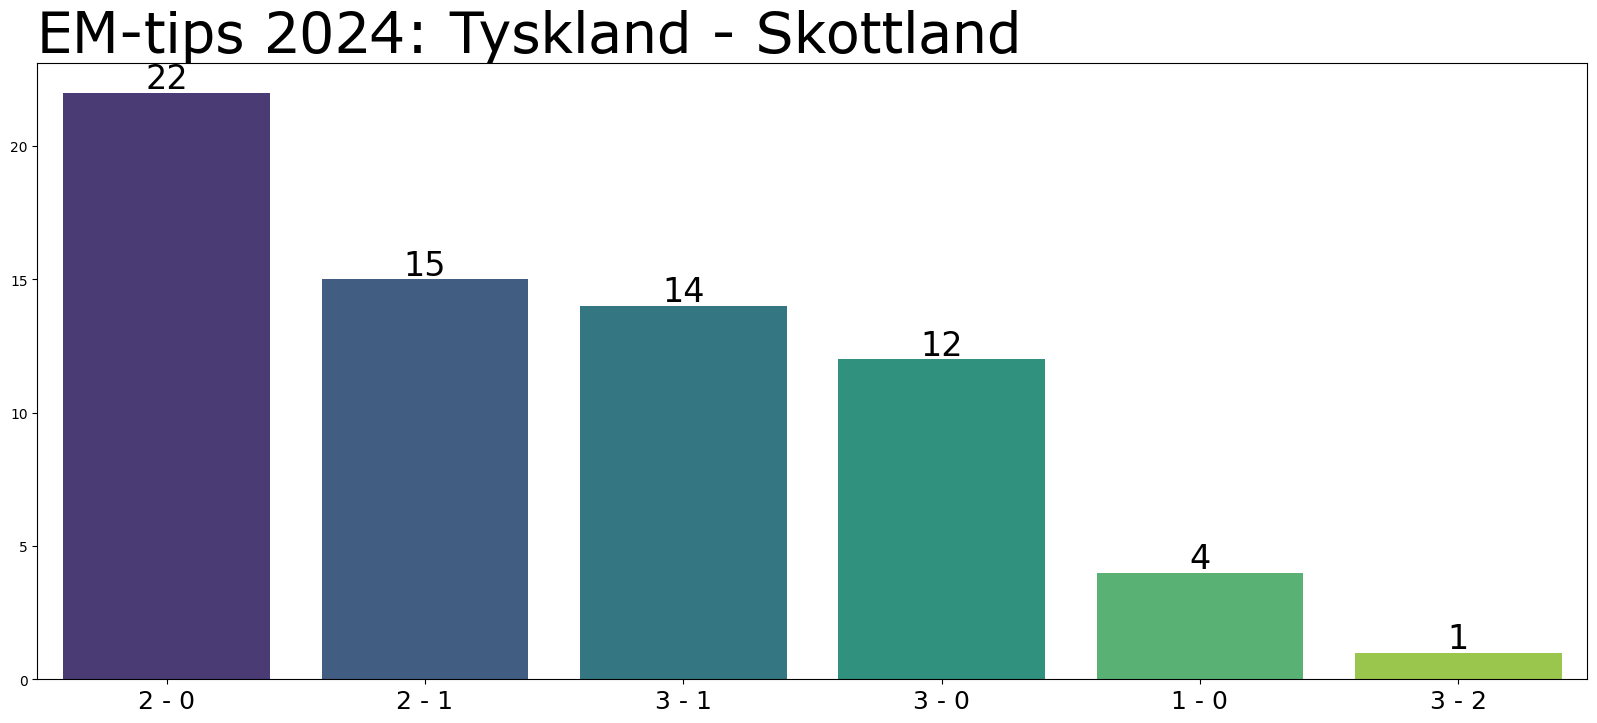

In [80]:
create_plot(scores, "EM-tips 2024: Tyskland - Skottland", "germany_scotland")

In [29]:
scores = {}
signs = {}
for key in df.keys():
    r = df[key]['matches'][1]
    res = r[0] + "-" + r[1]
    s = r[2]
    if res in scores:
        scores[res] += 1
    else:
        scores[res] = 1
    if s in signs:
        signs[s] += 1
    else:
        signs[s] = 1 

In [30]:
scores

{'1-1': 20,
 '0-1': 5,
 '1-0': 1,
 '0-3': 1,
 '1-3': 2,
 '0-2': 2,
 '0-0': 2,
 '1-2': 7,
 '2-1': 1,
 '2-2': 1}

In [31]:
signs

{'X': 24, '1': 2, '2': 16}

In [32]:
signs = {'X': 23, '1': 2, '2': 17}

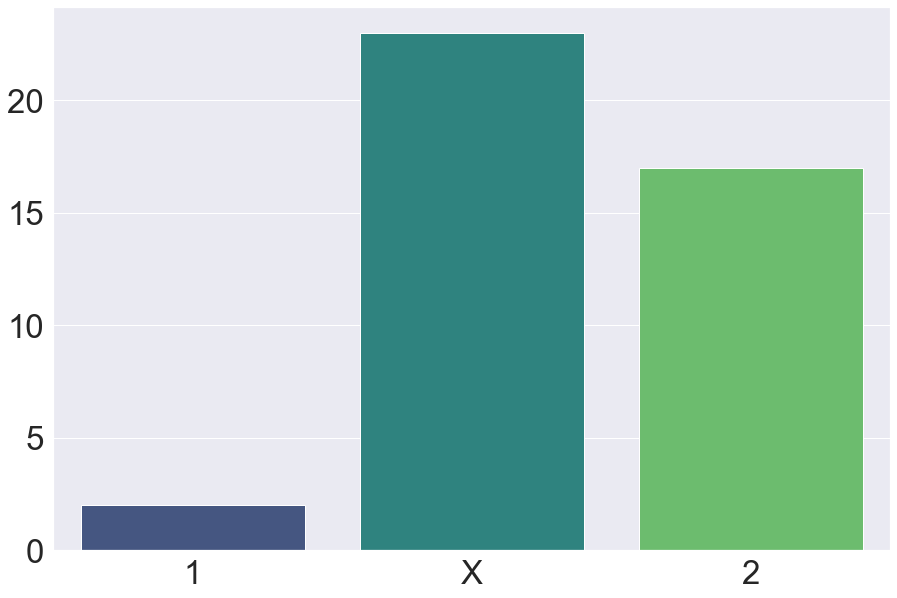

In [41]:
x = np.array(list(signs.keys()))
y = np.array(list(signs.values()))
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
sns.set(font_scale = 3)
barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax, order=['1', 'X', '2'])
fig = barp.get_figure()
fig.savefig(dpi=300, fname="signs_plot_2")

In [34]:
sort_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

In [35]:
sort_scores

[('1-1', 20),
 ('1-2', 7),
 ('0-1', 5),
 ('1-3', 2),
 ('0-2', 2),
 ('0-0', 2),
 ('1-0', 1),
 ('0-3', 1),
 ('2-1', 1),
 ('2-2', 1)]

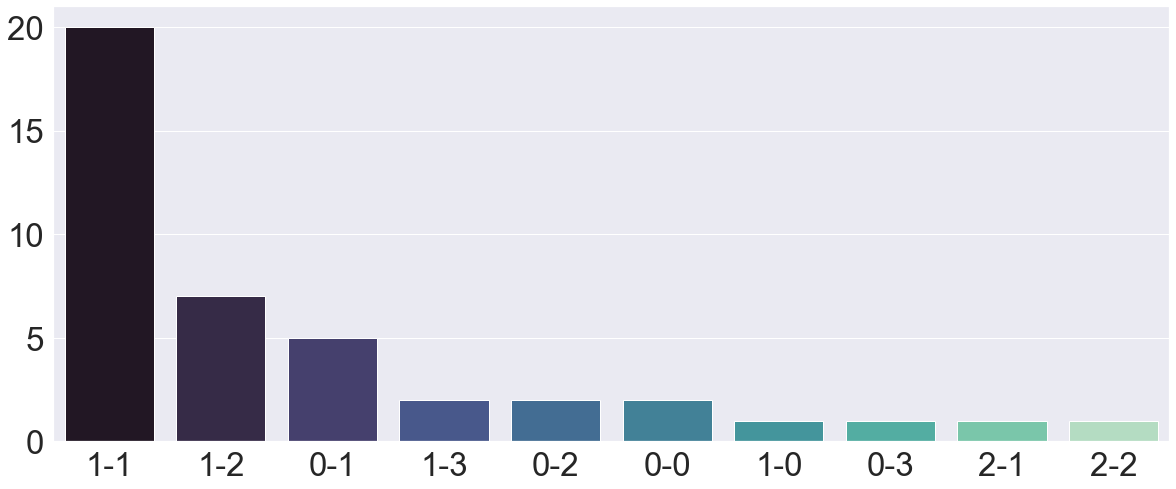

In [40]:
x = []
y = []
for val in sort_scores:
    x.append(val[0])
    y.append(val[1])
x = np.array(x)
y = np.array(y)
dims = (20, 8)
sns.set(font_scale = 3)
fig, ax = plt.subplots(figsize=dims)
barp = sns.barplot(x=x, y=y, palette="mako", ax=ax)
fig = barp.get_figure()
fig.savefig(dpi=300, fname="scores_plot_2")

In [44]:
in_final = {}
for key in df.keys():
    finalTeams = df[key]['final']
    team_1, team_2 = finalTeams
    if team_1 in in_final:
        in_final[team_1] += 1
    else:
        in_final[team_1] = 1
    if team_2 in in_final:
        in_final[team_2] += 1
    else:
        in_final[team_2] = 1

In [45]:
in_final

{'Tyskland': 14,
 'Portugal': 15,
 'Frankrike': 27,
 'England': 10,
 'Italien': 7,
 'Spanien': 2,
 'Belgien': 5,
 'Sverige': 2,
 'Nederländerna': 2}

In [71]:
test = sorted(in_final.values())

In [76]:
in_final_sorted = {k: v for k, v in sorted(in_final.items(), key=lambda item: item[1], reverse=True)}

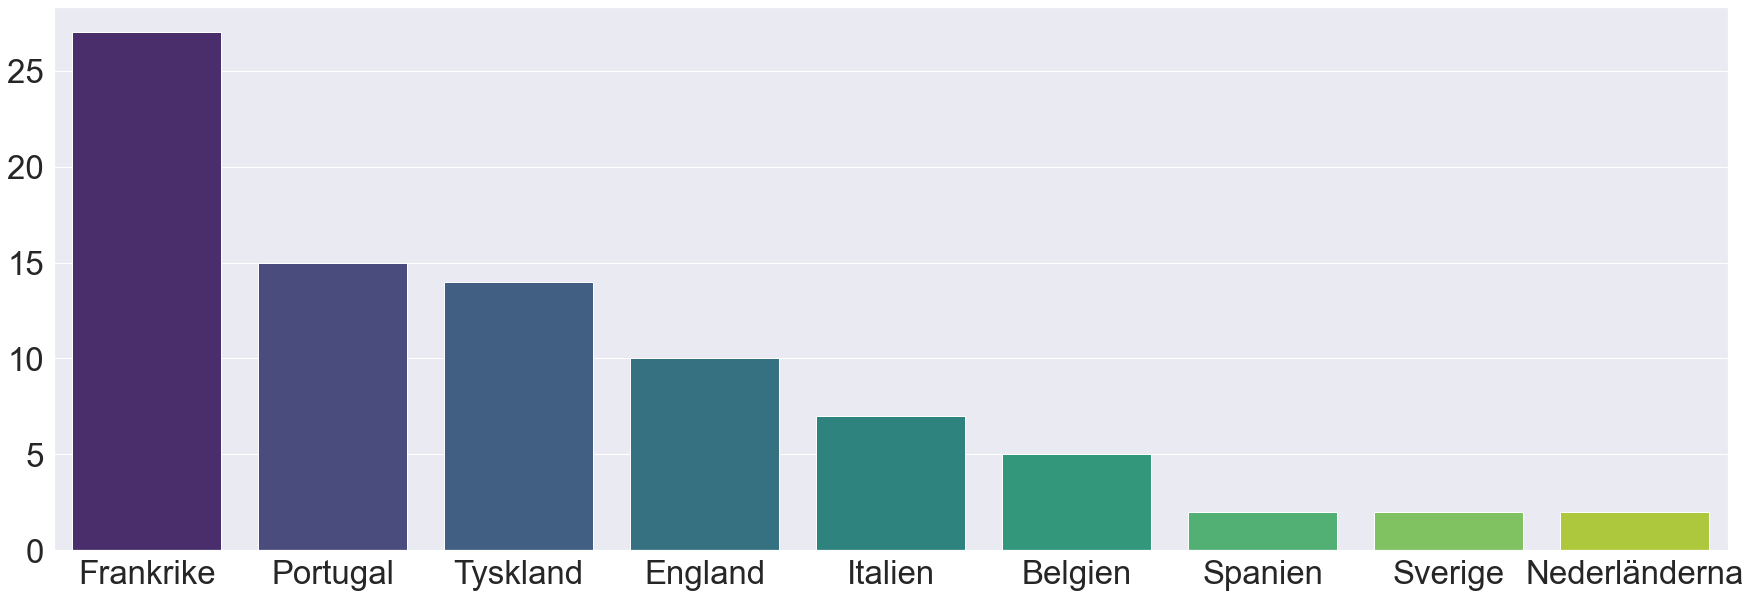

In [79]:
x = np.array(list(in_final_sorted.keys()))
y = np.array(list(in_final_sorted.values()))
dims = (30, 10)
fig, ax = plt.subplots(figsize=dims)
sns.set(font_scale = 3)
barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)
fig = barp.get_figure()
fig.savefig(dpi=300, fname="in_final_plot")

In [47]:
in_semifinal = {}
for key in df.keys():
    semiTeams = df[key]['semifinals']
    for team in semiTeams:
        if team in in_semifinal:
            in_semifinal[team] += 1
        else:
            in_semifinal[team] = 1

In [78]:
in_semifinal_sorted = {k: v for k, v in sorted(in_semifinal.items(), key=lambda item: item[1], reverse=True)}

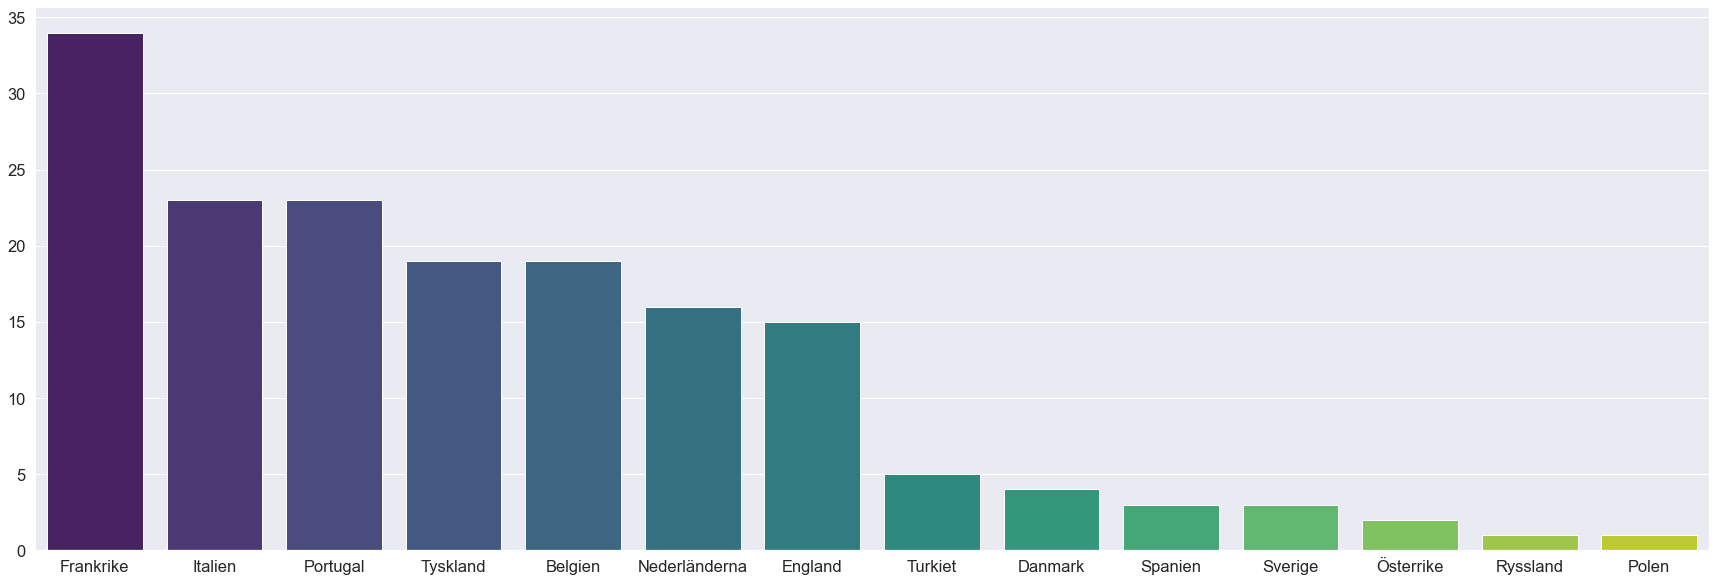

In [82]:
x = np.array(list(in_semifinal_sorted.keys()))
y = np.array(list(in_semifinal_sorted.values()))
dims = (30, 10)
fig, ax = plt.subplots(figsize=dims)
sns.set(font_scale = 1.5)
barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)
fig = barp.get_figure()
fig.savefig(dpi=300, fname="in_semifinal_plot")

In [49]:
in_quarterfinal = {}
for key in df.keys():
    quarterTeams = df[key]['quarterfinals']
    for team in quarterTeams:
        if team in in_quarterfinal:
            in_quarterfinal[team] += 1
        else:
            in_quarterfinal[team] = 1

In [85]:
in_quarterfinal_sorted = {k: v for k, v in sorted(in_quarterfinal.items(), key=lambda item: item[1], reverse=True)}

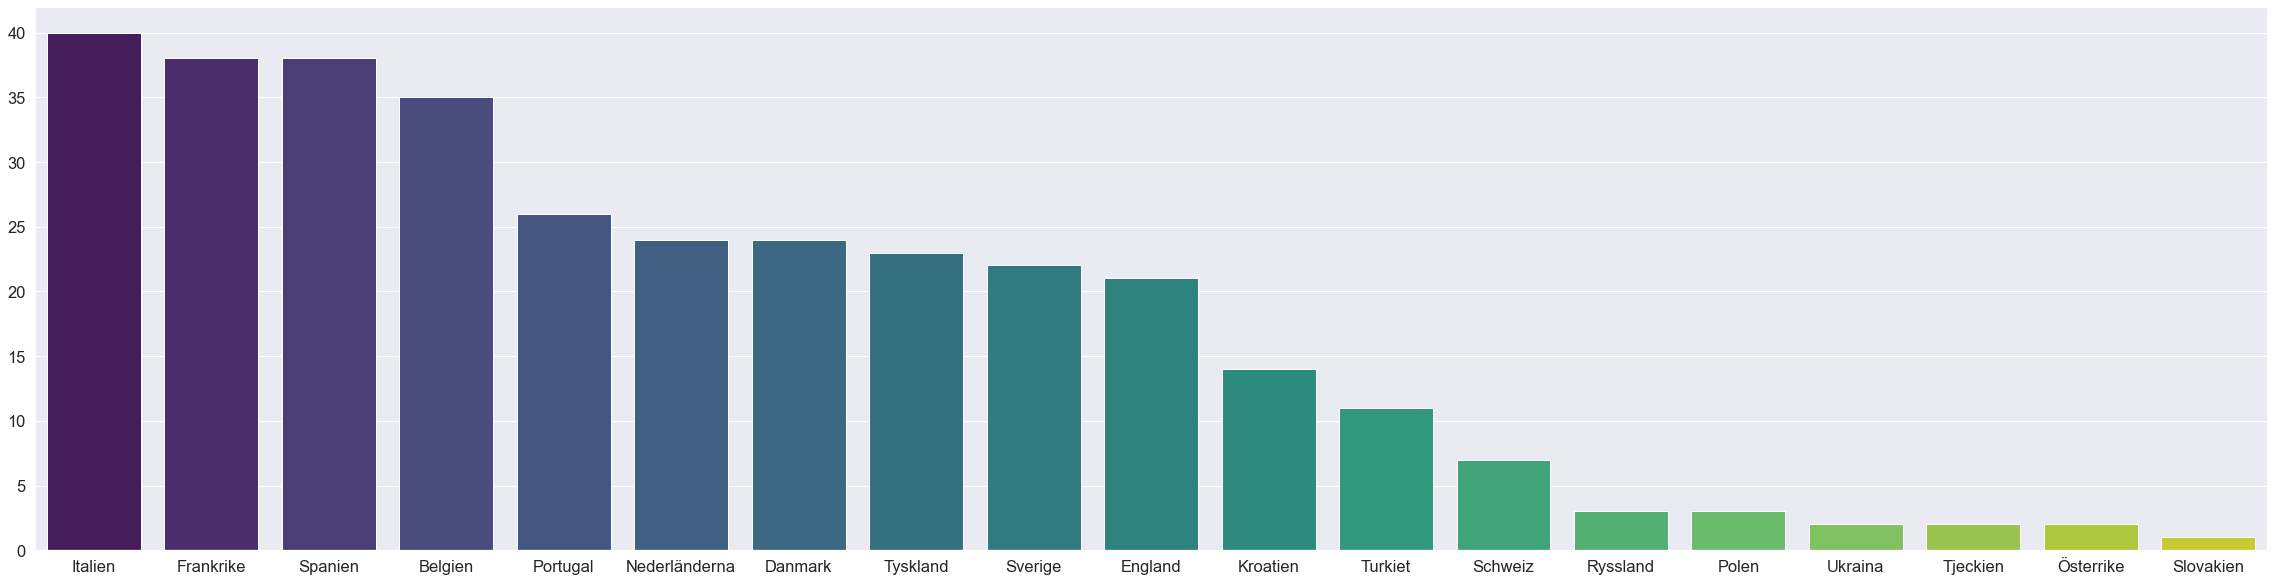

In [89]:
x = np.array(list(in_quarterfinal_sorted.keys()))
y = np.array(list(in_quarterfinal_sorted.values()))
dims = (40, 10)
fig, ax = plt.subplots(figsize=dims)
sns.set(font_scale = 1.5)
barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)
fig = barp.get_figure()
fig.savefig(dpi=300, fname="in_quarterfinal_plot")

In [51]:
in_sixteen = {}
for key in df.keys():
    sixteenTeams = df[key]['roundofsixteen']
    for team in sixteenTeams:
        if team in in_sixteen:
            in_sixteen[team] += 1
        else:
            in_sixteen[team] = 1

In [90]:
in_sixteen_sorted = {k: v for k, v in sorted(in_sixteen.items(), key=lambda item: item[1], reverse=True)}

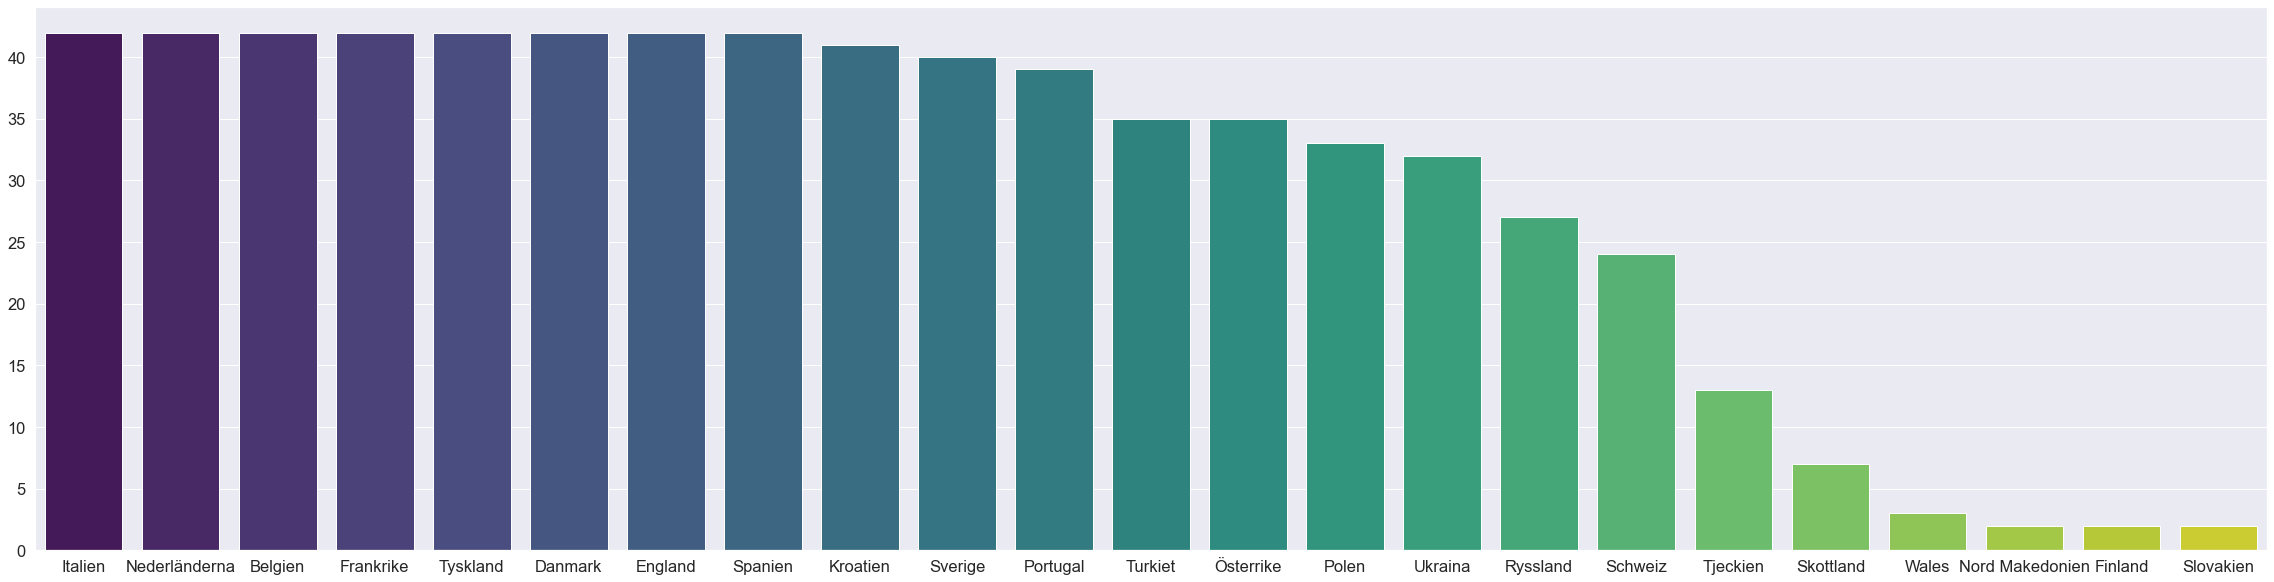

In [92]:
x = np.array(list(in_sixteen_sorted.keys()))
y = np.array(list(in_sixteen_sorted.values()))
dims = (40, 10)
fig, ax = plt.subplots(figsize=dims)
sns.set(font_scale = 1.5)
barp = sns.barplot(x=x, y=y, palette="viridis", ax=ax)
fig = barp.get_figure()
fig.savefig(dpi=300, fname="in_sixteen_plot")